32
[[0.11516103 0.96868099 0.00548296 0.00542976 0.00212126 0.0340264
  0.12862874 0.07979301 0.04909018 0.15259994 0.0443267  0.00697088
  0.13837813 0.02956793 0.01350359 0.02333496]
 [0.00976772 0.4262556  0.00762415 0.00636011 0.00510788 0.01150434
  0.21057652 0.08036082 0.12171749 0.03388859 0.00932313 0.00982676
  0.13068385 0.0307817  0.00244425 0.25780607]
 [0.01013385 0.91907626 0.03886779 0.02082594 0.04702363 0.00114211
  0.88261497 0.22477146 0.80395044 0.0067916  0.0021472  0.07497971
  0.15093192 0.03871698 0.00260203 0.821853  ]
 [0.10553783 0.97554574 0.05898284 0.05574754 0.0275624  0.01537567
  0.87995766 0.80922457 0.40556059 0.06696327 0.01972066 0.10794299
  0.21779882 0.05897901 0.01029553 0.18885116]
 [0.08603967 0.94747152 0.02481809 0.00952954 0.03685085 0.01531145
  0.88120778 0.13421909 0.82995035 0.06606372 0.02043936 0.06633181
  0.13791144 0.03203961 0.01601932 0.05862061]]
Silhouette Score: 0.3495910154105028
Cluster
0    3503
4    2103
3    1170
1    10

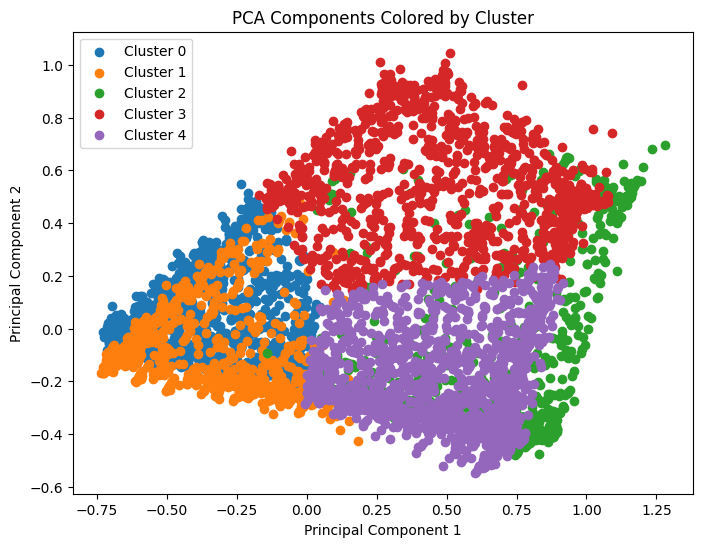

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster,Distance_to_centroid
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,0,0.289099
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,0,0.306002
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,3,0.519586
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,0,0.219233
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,4,0.381137


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial import distance

df = pd.read_csv("/users/amulya/Downloads/CustomerData.csv")
# print(df.head)
unwanted_columns = ['CUST_ID','TENURE']
df = df.drop(unwanted_columns,axis = 1)
df = df.dropna()
a = df.isnull().sum()
# print(a)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns = df.columns)
# print(X_scaled.head()) 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data = kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
a = kmeans.n_iter_
print(a)
# print(cluster_labels)
df['Cluster'] = cluster_labels
print(centroids)
silhouette_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_score)
print(df['Cluster'].value_counts())
# print(df.head())
pca = PCA(n_components=2)  # Choose the number of components (e.g., 2 for visualization)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA components and color by cluster
plt.figure(figsize=(8, 6)) 
for i in range(5):  # Assuming 5 clusters
    plt.scatter(X_pca[df['Cluster'] == i, 0], X_pca[df['Cluster'] == i, 1], label=f'Cluster {i}')

plt.title('PCA Components Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


distances = distance.cdist(X_scaled, centroids, 'euclidean')
df['Distance_to_centroid'] = np.min(distances, axis=1)
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

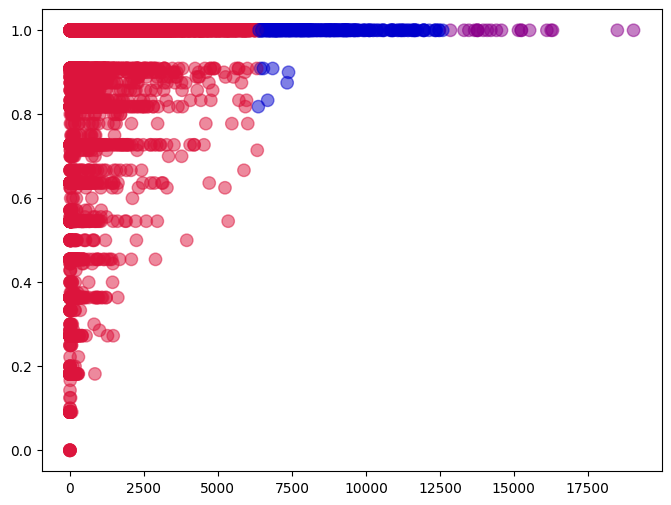

In [11]:
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, label='Data Points')

# # Plot the centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='red', edgecolors='k', label='Centroids')

# # Add labels and legend
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-means Clustering with Centroids')
# plt.legend()

# # Show plot
# plt.show()
from matplotlib.colors import ListedColormap
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['BALANCE'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()